In [1]:
import pandas as pd
import seaborn as sb
from sklearn import preprocessing
from collections import Counter
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv("JSVulnerabilityDataSet-1.0.csv")

In [3]:
df.columns


Index(['name', 'longname', 'path', 'full_repo_path', 'line', 'column',
       'endline', 'endcolumn', 'CC', 'CCL', 'CCO', 'CI', 'CLC', 'CLLC', 'McCC',
       'NL', 'NLE', 'CD', 'CLOC', 'DLOC', 'TCD', 'TCLOC', 'LLOC', 'LOC', 'NOS',
       'NUMPAR', 'TLLOC', 'TLOC', 'TNOS', 'HOR_D', 'HOR_T', 'HON_D', 'HON_T',
       'HLEN', 'HVOC', 'HDIFF', 'HVOL', 'HEFF', 'HBUGS', 'HTIME', 'CYCL',
       'PARAMS', 'CYCL_DENS', 'Vuln'],
      dtype='object')

In [4]:
X = df[[ 'CC', 'CCL', 'CCO', 'CI', 'CLC', 'CLLC', 'McCC',
         'NL', 'NLE', 'CD', 'CLOC', 'DLOC', 'TCD', 'TCLOC',
         'LLOC', 'LOC', 'NOS','NUMPAR', 'TLLOC', 'TLOC',
         'TNOS', 'HOR_D', 'HOR_T', 'HON_D', 'HON_T',
         'HLEN', 'HVOC', 'HDIFF', 'HVOL', 'HEFF',
         'HBUGS', 'HTIME', 'CYCL',  'PARAMS',
         'CYCL_DENS']].values

In [5]:
y = df['Vuln']

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    train_size=0.8,
                                                    test_size=0.2)

In [7]:
from sklearn.neighbors import KNeighborsClassifier
# classifier "out of the box", no parameters
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [8]:
print("Predictions from the classifier:")
test_data_predicted = knn.predict(X_test)
print(test_data_predicted)
print("Target values:")
print(y_test)

Predictions from the classifier:
[0 0 0 ... 0 0 1]
Target values:
10744    0
1613     0
10490    1
490      0
232      1
        ..
7711     0
11793    0
5999     0
8724     0
11101    1
Name: Vuln, Length: 2425, dtype: int64


In [9]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
print(accuracy_score(test_data_predicted, y_test))
print(f1_score(test_data_predicted, y_test))
print(precision_score(test_data_predicted, y_test))
print(recall_score(test_data_predicted, y_test))



0.9389690721649484
0.6967213114754098
0.6181818181818182
0.7981220657276995


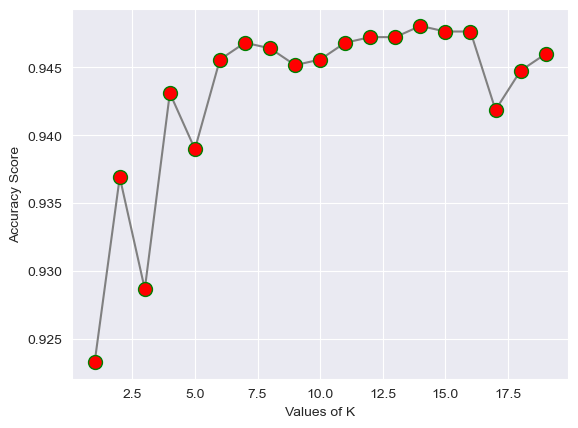

In [10]:
import matplotlib.pyplot as plt

normal_accuracy = []
k_values = range(1,20)

for k in k_values :
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    test_data_predicted = knn.predict(X_test)
    accur = accuracy_score(test_data_predicted, y_test)
    normal_accuracy.append(accur)

plt.plot(k_values,normal_accuracy,c="grey",marker="o",ms=10,mfc ='red', mec="green")
plt.xlabel("Values of K")
plt.ylabel("Accuracy Score")
plt.grid(True)
plt.show()

In [11]:
from sklearn import tree

tree = tree.DecisionTreeClassifier()
tree.fit(X_train, y_train)
test_data_predicted2 = tree.predict(X_test)

print(accuracy_score(test_data_predicted2, y_test))
print(f1_score(test_data_predicted2, y_test))
print(precision_score(test_data_predicted2, y_test))
print(recall_score(test_data_predicted2, y_test))


0.9290721649484536
0.6906474820143885
0.6981818181818182
0.6832740213523132


In [12]:
import numpy as np
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

from sklearn.svm import SVC
clf = SVC(gamma='auto')
clf.fit(X_train, y_train)


SVC(gamma='auto')

In [13]:
test_data_predicted3 = clf.predict(X_test)

print(accuracy_score(test_data_predicted3, y_test))
print(f1_score(test_data_predicted3, y_test))
print(precision_score(test_data_predicted3, y_test))
print(recall_score(test_data_predicted3, y_test))

0.951340206185567
0.7354260089686098
0.5963636363636363
0.9590643274853801


In [14]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(X_train, y_train)

test_data_predicted4 = gnb.predict(X_test)

print(accuracy_score(test_data_predicted4, y_test))
print(f1_score(test_data_predicted4, y_test))
print(precision_score(test_data_predicted4, y_test))
print(recall_score(test_data_predicted4, y_test))

0.8585567010309278
0.15724815724815727
0.11636363636363636
0.24242424242424243


In [15]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(random_state=0)

lr.fit(X_train, y_train)



/Users/timofey/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=0)

In [16]:
test_data_predicted5 = lr.predict(X_test)

print(accuracy_score(test_data_predicted5, y_test))
print(f1_score(test_data_predicted5, y_test))
print(precision_score(test_data_predicted5, y_test))
print(recall_score(test_data_predicted5, y_test))

0.9191752577319587
0.47027027027027024
0.31636363636363635
0.9157894736842105
